<a href="https://drive.google.com/file/d/1nqVDhjIa1VzQrHPUidYP7bqyHc4egOH7/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Sentiment Analysis Indonesia Presidential Election 2019

Background:
Pemilu Presiden (Pilpres) 2019 di Indonesia merupakan salah satu momen politik paling dinamis dan berpengaruh dalam sejarah demokrasi negara. Persaingan antara kandidat, dinamika kampanye, serta keterlibatan masyarakat dalam diskusi politik meningkat secara signifikan.
Twitter sebagai platform utama digunakan oleh masyarakat untuk menyampaikan opini, dukungan, kritik, serta reaksi terhadap berbagai isu yang berkembang selama Pilpres 2019. Interaksi dalam bentuk tweet, retweet, dan hashtag mencerminkan pandangan publik secara luas.
Analisis sentimen memiliki peran penting dalam memahami opini publik terhadap kandidat dan isu-isu terkait. Dengan teknik pemrosesan bahasa alami (NLP), analisis ini dapat mengungkap tren sentimen, persepsi masyarakat, serta faktor-faktor yang mempengaruhi opini publik selama periode pemilu.


* Objectives ;
Mengidentifikasi algoritma terbaik (Random Forest vs LSTM) untuk analisis sentimen
Mengoptimalkan pemrosesan data teks dengan berbagai teknik preprocessing seperti stemming, stopwords removal, tokenization, dan normalisasi teks
Membandingkan performa model berdasarkan matriks evaluasi seperti akurasi, presisi, recall, dan F1-score untuk memilih model terbaik

# **Load & Understand Dataset**
# **Text Preprocessing**

In [67]:
import pandas as pd

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv(r'/content/drive/My Drive/bootacampNLP/1. Project I Sentiment Analisis/tweet.csv', index_col = 0)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 42.5+ KB


In [71]:
df

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


## summary load & understand data set

*   Data berjumlah 1.815
*   Terdapat 3 label data
*   Label Sentimen sebagai y atau yang akan di prediksi
*   Label Tweet sebagai x (variabel)

Hal yang perlu menjadi perhatian
*   Data yang ada terdapat column yang integer sehingga perlu ditangani atau drop

## Menghilangkan Stopwords

In [72]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# Menyimpan tweet sebelum stopwords dihapus
df["tweet_original"] = df["tweet"]

In [74]:
# Fungsi untuk menghapus stopwords dan memperkecil huruf
def stopwords_removal(text):
    stop_words = set(stopwords.words("indonesian"))
    additional_stopwords = {"yg", "oh", "saja"}
    stop_words.update(additional_stopwords)
    text_lowered = text.lower()
    cleaned_text = " ".join([word for word in text_lowered.split(" ") if word not in stop_words])
    return cleaned_text

In [75]:
# Mengaplikasikan stopwords pada tweet
df["tweet_cleaned"] = df["tweet"].apply(stopwords_removal)

In [76]:
# Menampilkan perbandingan sebelum dan sesudah terkena stopwords
df[["tweet_original", "tweet_cleaned"]].sample(10)

,tweet_original,tweet_cleaned
264,Kalau Pak Prabowo dan Bang Sandi tak ambil gaj...,"prabowo bang sandi ambil gaji terpilih nanti, ..."
553,"SUDAH WAKTUNYA GANTI PEMIMPIN, KARENA KAMI BUT...","ganti pemimpin, butuh perubahan , 5 jokowi mem..."
51,Presiden Jokowi dan Raja Salman Sepakat Tingka...,presiden jokowi raja salman sepakat tingkatkan...
960,"Apaaaaa????? Gaji di berikan ke rakyat ,,, mat...","apaaaaa????? gaji rakyat ,,, matamu kwi ,,,gaj..."
245,"Ngapain holdang holding pake Istilah ""world cl...","ngapain holdang holding pake istilah ""world cl..."
309,EH BEGO! LU TAU GA SEKARANG BANYAK PERUSAHAAN ...,eh bego! lu tau ga perusahaan fintech beli coi...
1217,Mereka seperti pimp era sebelumnya mulai soeha...,"pimp era soeharto memainkan bahan pokok murah,..."
495,"Senang,gembira lihat lautan manusia kemarin te...","senang,gembira lihat lautan manusia kemarin te..."
1488,Gaji gak di ambil..? Sudah kaya? Lah napa kmrn...,gaji gak ambil..? kaya? napa kmrn sumbangan da...
1241,Saya kasih yg mudah2 aja dulu...Naikin level e...,kasih mudah2 aja dulu...naikin level ekonomi 5...


## Melakukan data preprocessing (EDA) sebelum dilakukan train

Proses yang dilakukan

*   Merubah tweet menjadi huruf kecil
*   Merubah emoticon / emoji menjadi kata yang bermakna
*   Menghapus tanda baca & karakter khusus
*   Menghapus #, username , @, dan URL
*   Menghapus stopwords

## Membersihkan Tanda Baca


In [77]:
import re
# Membuat fungsi menghilangkan tanda baca
def remove_punctuation_and_special_character(text):
  tweet_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return tweet_cleaned

In [78]:
# Menghapus tanda baca
df["tweet_cleaned"] = df["tweet_cleaned"].apply(remove_punctuation_and_special_character)

In [79]:
# Membandingkan tweet sebelum dan sesudah dihilangkannya tanda baca
df[["tweet_original", "tweet_cleaned"]].sample(10)

,tweet_original,tweet_cleaned
529,Kalau pak prabowo saya tau dia dari dulu meman...,prabowo tau ambil gaji anggota info bpk2 purn...
1416,Kreatip nian petani kita. Buat Bpk @Prabowo @...,kreatip nian petani kita bpk prabowo sandi tu...
1106,"Tak ambil gaji tpi ambil uang fee proyek, kkn...",ambil gaji tpi ambil uang fee proyek kkn koru...
184,Udah gagal minta 2 priode. Saat debat bukan fo...,udah gagal 2 priode debat fokus ekonomi bahas ...
1230,"Mau gaji gk dibayar seperti di kiani kertas, a...",gaji gk dibayar kiani kertas pilih prabowo san...
983,Saya kira apa yang disampaikan pak @jokowi bah...,jokowi merubah mengembangkan mudah tahapantaha...
659,"Dg Bangga, Membangkitkan Kembali Usaha Ekonomi...",dg bangga membangkitkan usaha ekonomi kerakyat...
249,Anda sehat?pangkalan itu harga udah di tentuka...,sehatpangkalan harga udah tentukan masanda fki...
635,Pak sandi memikirkan ekonomi satu dan dua oran...,sandi memikirkan ekonomi orang saja mengeluh b...
1000,Ayo yg smart bantu mengoreksi dan memperbaiki...,ayo smart bantu mengoreksi memperbaiki berjal...


## Melakukan Normalisasi

In [80]:
# Membuat kamus untuk menormalisasi beberapa kata
normalization_dict = {
    "gak": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "g" : "tidak",
    "klo": "kalau",
    "dgn": "dengan",
    "dr": "dari",
    "utk" : "untuk"
}

In [81]:
# Membuat fungsi untuk menormalisasikan teks
def normalize_text(text):
    words = text.split()
    normalized_words = [normalization_dict[word] if word in normalization_dict else word for word in words]
    return " ".join(normalized_words)

In [82]:
# Menerapkan normalisasi
df["tweet_normalized"] = df["tweet_cleaned"].apply(normalize_text)

In [83]:
# Membandingkan teks sebelum dan sesudah di normalisasi
df[["tweet_cleaned", "tweet_normalized"]].sample(10)

,tweet_cleaned,tweet_normalized
524,ahy prabowo hargai jasa presiden,ahy prabowo hargai jasa presiden
395,titipkan amanah kepadamu bang tetaplah perjuan...,titipkan amanah kepadamu bang tetaplah perjuan...
788,gaji prbwo sandi 65jt kaum duafa uang tilep ...,gaji prbwo sandi 65jt kaum duafa uang tilep ra...
839,sandiuno mantaappppp bilang turunkan harga lis...,sandiuno mantaappppp bilang turunkan harga lis...
144,difitnah ulama oposisi divhumaspolri ccicpolri...,difitnah ulama oposisi divhumaspolri ccicpolri...
1318,prabowo sandi pertumbuhan ekonomi pangan maju ...,prabowo sandi pertumbuhan ekonomi pangan maju ...
1248,hahaha jdi ragu ama joko tntang pemahaman ekon...,hahaha jdi ragu ama joko tntang pemahaman ekon...
517,ngga ya janji masyg ngomong bikin rencana send...,tidak ya janji masyg ngomong bikin rencana sen...
743,ga mengatasi cad ga membangun industri nasiona...,tidak mengatasi cad tidak membangun industri n...
245,ngapain holdang holding pake istilah world cla...,ngapain holdang holding pake istilah world cla...


## Melakukan Tokenisasi


In [84]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
def tokenize_tweet(text):
    if isinstance(text, str):
        return text.split()
    return []

In [86]:
df["tweet_tokenized"] = df["tweet_normalized"].apply(tokenize_tweet)

In [87]:
tweet_tokenized = [token for tokens in df["tweet_tokenized"] for token in tokens]

In [88]:
# Menghitung frekuensi kata
word_frequencies = Counter(tweet_tokenized)
general_words = word_frequencies.most_common(15)

In [89]:
# Mengubah ke Dataframe untuk dilanjutkan ke visualisasi
word_df = pd.DataFrame(general_words, columns=["word", "count"])

<ipython-input-90-e4a11182210a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=word_df, palette="viridis")


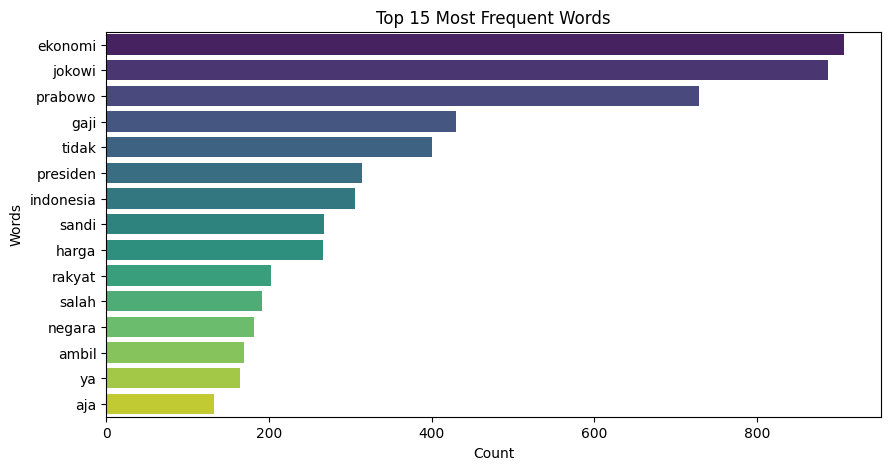

In [90]:
# Visualisasi frekuensi kata setelah tokenisasi
plt.figure(figsize=(10, 5))
sns.barplot(x="count", y="word", data=word_df, palette="viridis")
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

## Melakukan Stemming

In [91]:
!pip install Sastrawi

In [92]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [93]:
# Membuat stemmer
stemmer = StemmerFactory().create_stemmer()

In [94]:
# Fungsi stemming setelah tokenisasi
def stemming_text(tokens):
    if isinstance(tokens, list):
        [stemmer.stem(token) for token in tokens]
        return " ".join(tokens)
    return tokens

In [ ]:
df["stemmed_tweet"] = df["tweet_tokenized"].apply(stemming_text)

In [ ]:
# Menampilkan perbandingan teks sebelum dan sesudah di stemming
df[["tweet_tokenized", "stemmed_tweet"]].head(10)

## Vectorization


### Frequency Based Vectorization Menggunakan TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
frequency_vectorizer = TfidfVectorizer()
X_tfidf = frequency_vectorizer.fit_transform(df["stemmed_tweet"])

In [ ]:
print("TF-IDF Shape :", X_tfidf.shape)

### Prediction Based Vectorization Menggunakan Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
stemmed_tweet = df["stemmed_tweet"]

In [ ]:
# Melatih Word2Vec
word2vec = Word2Vec(sentences=stemmed_tweet, vector_size=100, window=5, min_count=1, workers = 4)

In [ ]:
# Menghitung rata-rata sebelum menerapkan Word2Vec ke Dataset
def avg_word2vec(tokens, model, vector_size=100):
    vector = [model.wv[token] for token in tokens if token in model.wv]
    if vector:
        return np.mean(vector, axis=0)
    else:
        return np.zeros(vector_size)

In [ ]:
# Mengaplikasikan Word2Vec ke Dataset
X_word2vec = np.array([avg_word2vec(tokens, word2vec) for tokens in stemmed_tweet])

In [ ]:
print("Word2Vec Shape:", X_word2vec.shape)

### Menyiapkan Label

In [ ]:
y = df["sentimen"]

# Data Modelling


## Menggabungkan Vectorization TF-IDF dengan Algoritma Random Forest:

In [ ]:
# pip install tensorflow==2.14.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Membagi data (Data Split)

In [ ]:
# Split Data dengan Rasio 80:20
X_train1, X_test1, y_train1, y_test1 = train_test_split(df["stemmed_tweet"], y, test_size=0.2, random_state=42) # Use the original 'stemmed_tweet' column



#Vektorisasi data Tweet

In [ ]:
# Vectorize
stop_words = list(stopwords.words('indonesian'))  # Convert set to list
vectorizer = TfidfVectorizer(stop_words='english')
X_train1 = vectorizer.fit_transform(X_train1)
X_test1 = vectorizer.transform(X_test1)


# Model & Train Model

In [ ]:
# Membuat Model
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)

# Menampilkan hasil (precision, recall, f1-score)

In [ ]:
# Evaluasi Model dengan Algoritma Random Forest dan Vectorization TF-IDF
y_pred = rf1.predict(X_test1)
print("TF-IDF + Random Forest Results:")
print(classification_report(y_test1, y_pred))

In [ ]:
# Menampilkan hasil X_train
y_pred = rf1.predict(X_train1)
print("TF-IDF + Random Forest Results:")
print(classification_report(y_train1, y_pred))

In [ ]:
# # Akurasi Sebelum Hyperparameter Tuning
# accuracy_score_rf1_before = accuracy_score(y_test1, y_pred_rf1_before)
# print("Accuracy Before Tuning:", accuracy_score_rf1_before)

In [ ]:
# Menggunakan RandomizedSearchCV pada Hyperparameter Tuning untuk mengoptimalkan Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameter_rscv = {
    'n_estimators': randint(50, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Inisialisasi Model
rf1_ht = RandomForestClassifier(random_state=42)

In [ ]:
# Inisialisasi RandomizedSearchCV
rscv1 = RandomizedSearchCV(
    estimator=rf1_ht,
    param_distributions=parameter_rscv,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [ ]:
rscv1.fit(X_train1, y_train1)

In [ ]:
print("Best Parameters:", rscv1.best_params_)
print("Best Accuracy:", rscv1.best_score_)

In [ ]:
# Perbandingan Sebelum dan Sesudah Hyperparameter Tuning
best_rf1 = rscv1.best_estimator_
y_pred_rf1_ht = best_rf1.predict(X_test1)
y_pred_before = rf1.predict(X_test1)  # Prediksi sebelum hyperparameter tuning
print("Evaluation Before Tuning:")
print(classification_report(y_test1, y_pred_before))
print("Evaluation After Tuning:")
print(classification_report(y_test1, y_pred_rf1_ht))
accuracy_before = accuracy_score(y_test1, y_pred_before)
accuracy_rf1_after = accuracy_score(y_test1, y_pred_rf1_ht)
print("Accuracy Before Tuning:", accuracy_before)
print("Accuracy After Tuning:", accuracy_rf1_after)


In [ ]:
import joblib

# Menyimpan model TF-IDF + Random Forest
joblib.dump(rscv1, 'tfidf_rf_tuned_model.pkl')
print("TF-IDF + Random Forest model saved as 'tfidf_rf_tuned_model.pkl'")

## Menggabungkan Vectorization Word2Vec dengan Algoritma Random Forest:

In [ ]:
# Split Data dengan Rasio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat Model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)

In [ ]:
# Evaluasi Model dengan Algoritma Random Forest dan Vectorization Word2Vec
y_pred = rf2.predict(X_test2)
print("Word2Vec + Random Forest Results:")
print(classification_report(y_test2, y_pred))

In [ ]:
# Menggunakan RandomizedSearchCV pada Hyperparameter Tuning untuk mengoptimalkan Model

In [ ]:
# Inisialisasi Model
rf2_ht = RandomForestClassifier(random_state=42)

In [ ]:
# Inisialisasi RandomizedSearchCV
rscv2 = RandomizedSearchCV(
    estimator=rf2_ht,
    param_distributions=parameter_rscv,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [ ]:
rscv2.fit(X_train1, y_train1)

In [ ]:
print("Best Parameters:", rscv2.best_params_)
print("Best Accuracy:", rscv2.best_score_)

In [ ]:
# Perbandingan Sebelum dan Sesudah Hyperparameter Tuning
best_rf2 = rscv2.best_estimator_
y_pred_rf1_ht = best_rf2.predict(X_test1)
print("Evaluation Before Tuning:")
print(classification_report(y_test1, y_pred))
print("Evaluation After Tuning:")
print(classification_report(y_test1, y_pred_rf1_ht))
accuracy_before = accuracy_score(y_test1, y_pred)
accuracy_rf2_after = accuracy_score(y_test1, y_pred_rf1_ht)
print("Accuracy Before Tuning:", accuracy_before)
print("Accuracy After Tuning:", accuracy_rf2_after)

In [ ]:
# Menyimpan Model
joblib.dump(rscv2, 'word2vec_rf_tuned_model.pkl')
print("Word2Vec + Random Forest model saved as 'word2vec_rf_tuned_model.pkl'")

## Menggabungkan Vectorization TF-IDF dengan Algoritma LSTM:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train1_dense = np.array(X_train1.toarray())
X_test1_dense = np.array(X_test1.toarray())
X_train1_dense = np.nan_to_num(X_train1_dense, nan=0.0, posinf=1.0, neginf=-1.0)
X_test1_dense = np.nan_to_num(X_test1_dense, nan=0.0, posinf=1.0, neginf=-1.0)

In [ ]:
# Membuat Model
lstm1 = Sequential([
    Input(shape=(X_train1_dense.shape[1],)),  # Input layer dengan dimensi TF-IDF
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer untuk klasifikasi biner
])

In [ ]:
lstm1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_train1_encoded = label_encoder.fit_transform(y_train1)
y_test1_encoded = label_encoder.transform(y_test1)

In [ ]:
lstm1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
lstm1.fit(X_train1_dense, y_train1_encoded, epochs=5, batch_size=64, validation_data=(X_test1_dense, y_test1_encoded))

In [ ]:
# Train model
#lstm1.fit(X_train1_dense, y_train1, epochs=5, batch_size=64, validation_data=(X_test1_dense, y_test1))

## Menggabungkan Vectorization Word2Vec dengan Algoritma LSTM:

In [ ]:
pip install keras-tuner

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall
import keras_tuner as kt
import tensorflow as tf


In [ ]:
np.random.seed(42)
X_word2vec = np.random.rand(1452, 100)
y = np.random.choice(['positif', 'negatif', 'netral'], size=1452)

In [ ]:
# Preprocessing Data
X_word2vec_3d = np.expand_dims(X_word2vec, axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_word2vec_3d, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train2_scaled = scaler.fit_transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_test2_scaled = scaler.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)


In [ ]:
# Mapping Labels
label_mapping = {'positif': 1, 'negatif': 0, 'netral': 2}
y_train2 = np.array([label_mapping[label] for label in y_train2]).astype('float32')
y_test2 = np.array([label_mapping[label] for label in y_test2]).astype('float32')

In [ ]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train2), y=y_train2)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

In [ ]:
# Membuat Model beserta dengan Hyperparameter Tuning nya
def build_lstm_model(hp):
    model = Sequential()

    for i in range(hp.Int('num_lstm_layers', 1, 3)):  # LSTM Layer
        model.add(LSTM(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            return_sequences=True if i < hp.Int('num_lstm_layers', 1, 3) - 1 else False,
            kernel_regularizer=l2(hp.Choice(f'l2_regularizer_{i}', [1e-4, 1e-3, 1e-2]))
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Opsi optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
    return model


In [ ]:
# Inisialisasi Tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_tuning_layers'
)


In [ ]:
# Melakukan Hyperparameter Tuning
tuner.search(
    X_train2_scaled.reshape(-1, 1, 100), y_train2,
    epochs=10,
    validation_data=(X_test2_scaled.reshape(-1, 1, 100), y_test2),
    batch_size=32,
    class_weight=class_weight_dict
)

In [ ]:
# Membangun model dengan Hyperparameter yang Terbaik
lstm2 = build_lstm_model(tuner.get_best_hyperparameters(1)[0])  # Build the model with the best hyperparameters
lstm2.fit(
    X_train2_scaled.reshape(-1, 1, 100), y_train2,
    epochs=5,
    batch_size=32,
    validation_data=(X_test2_scaled.reshape(-1, 1, 100), y_test2),
    class_weight=class_weight_dict
)

loss_before, accuracy_before, precision_before, recall_before = lstm2.evaluate(X_test2_scaled.reshape(-1, 1, 100), y_test2)

best_model = tuner.get_best_models(num_models=1)[0]
loss_after, accuracy_after, precision_after, recall_after = best_model.evaluate(X_test2_scaled.reshape(-1, 1, 100), y_test2)


In [ ]:
# Memberikan Hyperparameter Terbaik
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
print(f"Number of LSTM Layers: {best_hyperparameters.get('num_lstm_layers')}")
for i in range(best_hyperparameters.get('num_lstm_layers')):
    print(f"  Layer {i + 1}:")
    print(f"    Units: {best_hyperparameters.get(f'units_{i}')}")
    print(f"    Dropout: {best_hyperparameters.get(f'dropout_{i}')}")
    print(f"    L2 Regularizer: {best_hyperparameters.get(f'l2_regularizer_{i}')}")
print(f"Optimizer: {best_hyperparameters.get('optimizer')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

# Fungsi untuk menghitung F1-Score
def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * ((precision * recall) / (precision + recall))

f1_before = calculate_f1(precision_before, recall_before)
f1_after = calculate_f1(precision_after, recall_after)

# Perbandingan Sebelum dan Sesudah Hyperparameter Tuning
print("\nComparison Before and After Tuning:")
print(f"Accuracy: Before = {accuracy_before}, After = {accuracy_after}")
print(f"Precision: Before = {precision_before}, After = {precision_after}")
print(f"Recall: Before = {recall_before}, After = {recall_after}")
print(f"F1-Score: Before = {f1_before}, After = {f1_after}")

In [ ]:
# Menyimpan Model
lstm2.save('word2vec_lstm_tuned_model.h5')
print("Word2Vec + LSTM model saved as 'word2vec_lstm_tuned_model.h5'")

Word2Vec + LSTM model saved as 'word2vec_lstm_tuned_model.h5'


In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall

# Load the pre-trained models
rf_tfidf = joblib.load("tfidf_rf_tuned_model.pkl")
rf_word2vec = joblib.load("word2vec_rf_tuned_model.pkl")
lstm_model = load_model("word2vec_lstm_tuned_model.h5", compile=False)

# Load vectorizers separately if they are not part of the pipeline
# Cek apakah model sudah memiliki vectorizer bawaan
if hasattr(rf_tfidf, 'transform'):
    tfidf_vectorizer = rf_tfidf
elif hasattr(rf_tfidf, 'steps'):
    tfidf_vectorizer = rf_tfidf.steps[0][1]
else:
    raise ValueError("Vectorizer tidak ditemukan dalam model RF-TFIDF")

if hasattr(rf_word2vec, 'transform'):
    word2vec_vectorizer = rf_word2vec
elif hasattr(rf_word2vec, 'steps'):
    word2vec_vectorizer = rf_word2vec.steps[0][1]
else:
    raise ValueError("Vectorizer tidak ditemukan dalam model RF-Word2Vec")

# Ensure LSTM model is compiled
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision(), Recall()])

def preprocess_tfidf(sentence, vectorizer):
    """ Preprocess sentence using the TF-IDF vectorizer """
    return vectorizer.transform([sentence])

def preprocess_word2vec(sentence, vectorizer):
    """ Preprocess sentence using the Word2Vec vectorizer """
    return vectorizer.transform([sentence]).reshape(1, -1)

def predict_sentiment(sentence, rf_tfidf, rf_word2vec, lstm_model):
    try:
        # Preprocess input
        vectorized_tfidf = preprocess_tfidf(sentence, tfidf_vectorizer)
        vectorized_word2vec = preprocess_word2vec(sentence, word2vec_vectorizer)

        # Predictions
        rf_tfidf_pred = rf_tfidf.predict(vectorized_tfidf)
        rf_tfidf_prob = rf_tfidf.predict_proba(vectorized_tfidf).max()

        rf_word2vec_pred = rf_word2vec.predict(vectorized_word2vec)
        rf_word2vec_prob = rf_word2vec.predict_proba(vectorized_word2vec).max()

        lstm_pred_prob = lstm_model.predict(vectorized_word2vec.reshape(1, 1, -1))
        lstm_pred = lstm_pred_prob.argmax(axis=1)[0]
        lstm_prob = lstm_pred_prob.max()

        return {
            "Random Forest (TF-IDF)": (int(rf_tfidf_pred[0]), float(rf_tfidf_prob)),
            "Random Forest (Word2Vec)": (int(rf_word2vec_pred[0]), float(rf_word2vec_prob)),
            "LSTM (Word2Vec)": (int(lstm_pred), float(lstm_prob))
        }
    except Exception as e:
        return {"Error": str(e)}

# Example usage
sentence = "Ekonomi negara kita semakin memburuk hari demi hari"
results = predict_sentiment(sentence, rf_tfidf, rf_word2vec, lstm_model)

# Print results
for model_name, values in results.items():
    if "Error" in results:
        print(f"Error: {results['Error']}")
    else:
        pred, prob = values
        print(f"{model_name}: {pred} - {prob:.2%}")


ValueError: Vectorizer tidak ditemukan dalam model RF-TFIDF